In [1]:
# Import necessary Python packages
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

In [2]:
# Define necessary parameters (as constants)
X                  = 10                    # number of photons flowing into the detector system (positive integer)
P_D                = 1e-6                  # dark count probability (real number between 0 and 1)
ETA                = 0.1                   # detector efficiency (real number between 0 and 1)
MU                 = 0.02                  # mean number of photons detected on some time interval (positive real number)
# High coincidence
P_AB_H             = 0.5                   # probability of detecting the coincidence A B (real number between 0 and 1)
P_A_BAR_B_H        = 0                     # probability of detecting the coincidence A-bar B (real number between 0 and 1)
P_A_B_BAR_H        = 0                     # probability of detecting the coincidence A B-bar (real number between 0 and 1)
P_A_BAR_B_BAR_H    = 0.5                   # probability of detecting the coincidence A-bar B-bar (real number between 0 and 1)
P_A_H              = P_AB_H + P_A_B_BAR_H  # probability of detecting one basis A (real number between 0 and 1)
P_B_H              = P_AB_H + P_A_BAR_B_H  # probability of detecting one basis B (real number between 0 and 1)
# Low coincidence
P_AB_L             = 0                     # probability of detecting the coincidence A B (real number between 0 and 1)
P_A_BAR_B_L        = 0.5                   # probability of detecting the coincidence A-bar B (real number between 0 and 1)
P_A_B_BAR_L        = 0.5                   # probability of detecting the coincidence A B-bar (real number between 0 and 1)
P_A_BAR_B_BAR_L    = 0                     # probability of detecting the coincidence A-bar B-bar (real number between 0 and 1)
P_A_L              = P_AB_L + P_A_B_BAR_L  # probability of detecting one basis A (real number between 0 and 1)
P_B_L              = P_AB_L + P_A_BAR_B_L  # probability of detecting one basis B (real number between 0 and 1)
# As arrays
PROBABILITIES_HIGH = [P_AB_H, P_A_BAR_B_H, P_A_B_BAR_H, P_A_BAR_B_BAR_H]
PROBABILITIES_LOW  = [P_AB_L, P_A_BAR_B_L, P_A_B_BAR_L, P_A_BAR_B_BAR_L]

In [3]:
def partitions(k, n):
    masks = np.identity(k, dtype=int)
    for c in itertools.combinations_with_replacement(masks, n):
        yield sum(c)

def multinomial(photon, prob):
    multinomial_coeff = math.factorial(sum(photon)) / (math.factorial(photon[0]) * math.factorial(photon[1]) * math.factorial(photon[2]) * math.factorial(photon[3]))
    prob_coeff = prob[0]**photon[0] * prob[1]**photon[1] * prob[2]**photon[2] * prob[3]**photon[3]
    return multinomial_coeff * prob_coeff

def visibility(prob_high, prob_low):
    return (prob_high - prob_low) / (prob_high + prob_low)

In [4]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_1_actual1(p_d, eta, mu, prob):
    case1_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_1 = (1 - p_d)**2 * (1 - eta)**(2 * sum(photons) - 2) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[2]) * eta) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[1]) * eta)
            sum_multinomial += single_coin_1 * multinomial(photons, prob)
        case1_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    return case1_actual

def case_1_actual2(p_d, eta, mu, prob):
    return (1 - p_d)**2 * np.exp(mu * ((1 - eta)**2 - 1)) * ((p_d + (1 - p_d) * mu * (prob[0] + prob[2]) * eta * (1 - eta)) * (p_d + (1 - p_d) * mu * (prob[0] + prob[1]) * eta * (1 - eta)) + (1 - p_d)**2 * mu * prob[0] * eta**2)

In [5]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_2_actual(p_d, eta, mu, prob):
    case2_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_2 = (1 - p_d)**2 * (1 - eta)**(2 * photons[3] + photons[1] + photons[2]) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[2])) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[1]))
            sum_multinomial += single_coin_2 * multinomial(photons, prob)
        case2_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    return case2_actual

def case_2_approx(p_d, eta, mu, prob):
    return (1 - p_d)**2 * np.exp(mu * ((1 - eta)**2 - 1)) * ((p_d + mu * (prob[0] + prob[2]) * eta) * (p_d + mu * (prob[0] + prob[1]) * eta) + mu * prob[0] * eta**2)

In [6]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_3_actual(p_d, eta, mu, prob):
    case3_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_3 = (1 - eta)**(2 * photons[0] + photons[1] + photons[2] - 2) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[2]) * eta) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[1]) * eta)
            sum_multinomial += single_coin_3 * multinomial(photons, prob)
        case3_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    return case3_actual

def case_3_approx(p_d, eta, mu, prob):
    return (p_d + (1 - 2 * p_d) * mu * (prob[0] + prob[2]) * eta) * (p_d + (1 - 2 * p_d) * mu * (prob[0] + prob[1]) * eta) + (1 - 2 * p_d)**2 * mu * prob[0] * eta**2

In [7]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_4_actual(p_d, eta, mu, prob):
    case4_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_4 = (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[2]))) * (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[1])))
            sum_multinomial += single_coin_4 * multinomial(photons, prob)
        case4_actual += np.exp(-mu) * mu**x / math.factorial(x) * sum_multinomial
    return case4_actual

def case_4_approx(p_d, eta, mu, prob):
    return (p_d + (1 - p_d) * mu * (prob[0] + prob[2]) * eta) * (p_d + (1 - p_d) * mu * (prob[0] + prob[1]) * eta) + (1 - p_d)**2 * mu * prob[0] * eta**2

In [8]:
# Exact probabilities based on varying dark count probability
total_coin_prob_1_PD_high = []
total_coin_prob_2_PD_high = []
total_coin_prob_3_PD_high = []
total_coin_prob_4_PD_high = []
range_PD = np.arange(0.001, 1, 0.001)
for p_d in range_PD:
    total_coin_prob_1_PD_high.append(case_1_actual2(p_d, ETA, MU, PROBABILITIES_HIGH))
    total_coin_prob_2_PD_high.append(case_2_actual(p_d, ETA, MU, PROBABILITIES_HIGH))
    total_coin_prob_3_PD_high.append(case_3_actual(p_d, ETA, MU, PROBABILITIES_HIGH))
    total_coin_prob_4_PD_high.append(case_4_actual(p_d, ETA, MU, PROBABILITIES_HIGH))
print(total_coin_prob_1_PD_high)
print(total_coin_prob_2_PD_high)
print(total_coin_prob_3_PD_high)
print(total_coin_prob_4_PD_high)

[0.00010280855512669899, 0.0001071604111454225, 0.00011347132816614522, 0.00012172944124005472, 0.00013192290928668582, 0.00014403991509392053, 0.00015806866531798788, 0.0001739973904834643, 0.00019181434498327334, 0.00021150780707868553, 0.00023306607889931875, 0.00025647748644313807, 0.0002817303795764556, 0.0003088131320339308, 0.0003377141414185699, 0.0003684218292017271, 0.0004009246407231028, 0.0004352110451907455, 0.00047126953568104994, 0.0005090886291387588, 0.0005486568663769616, 0.0005899628120770952, 0.0006329950547889432, 0.0006777422069306372, 0.0007241929047886547, 0.0007723358085178219, 0.000822159602141311, 0.0008736529935506414, 0.000926804714505681, 0.0009816035206346434, 0.0010380381914340897, 0.001096097530268929, 0.0011557703643724157, 0.0012170455448461542, 0.0012799119466600935, 0.001344358468652531, 0.0014103740335301106, 0.0014779475878678244, 0.0015470681021090109, 0.001617724570565356, 0.001689906011416893, 0.0017636014667120014, 0.0018388000023674092, 0.001

In [9]:
total_coin_prob_1_PD_low = []
total_coin_prob_2_PD_low = []
total_coin_prob_3_PD_low = []
total_coin_prob_4_PD_low = []
for p_d in range_PD:
    total_coin_prob_1_PD_low.append(case_1_actual2(p_d, ETA, MU, PROBABILITIES_LOW))
    total_coin_prob_2_PD_low.append(case_2_actual(p_d, ETA, MU, PROBABILITIES_LOW))
    total_coin_prob_3_PD_low.append(case_3_actual(p_d, ETA, MU, PROBABILITIES_LOW))
    total_coin_prob_4_PD_low.append(case_4_actual(p_d, ETA, MU, PROBABILITIES_LOW))
print(total_coin_prob_1_PD_low)
print(total_coin_prob_2_PD_low)
print(total_coin_prob_3_PD_low)
print(total_coin_prob_4_PD_low)

[3.5857195987662184e-06, 8.334268116741416e-06, 1.5040686964876326e-05, 2.369311357927864e-05, 3.4279709262012316e-05, 4.678865918109761e-05, 6.120817237051103e-05, 7.752648173018537e-05, 9.573184402600976e-05, 0.00011581253988982944, 0.00013775687381944606, 0.0001615531741786176, 0.00018718979319705812, 0.00021465510697043816, 0.00024393751546038423, 0.0002750254424944798, 0.0003079073357662636, 0.0003425716668352316, 0.0003790069311268353, 0.00041720164793248297, 0.000457144360409539, 0.000498823635581324, 0.0005422280643371147, 0.0005873462614321449, 0.0006341668654876034, 0.0006826785389906365, 0.0007328699682943456, 0.0007847298636177892, 0.0008382469590459825, 0.0008934100125298957, 0.0009502078058864561, 0.0010086291447985473, 0.0010686628588150084, 0.0011302978013506364, 0.0011935228496861828, 0.001258326904968356, 0.0013246988922098208, 0.0013926277602891984, 0.0014621024819510664, 0.001533112053805958, 0.001605645496330364, 0.0016796918538667291, 0.001755240194623457, 0.00183

In [10]:
total_coin_prob_2_PD_high_approx = []
total_coin_prob_3_PD_high_approx = []
total_coin_prob_4_PD_high_approx = []
for p_d in range_PD:
    total_coin_prob_2_PD_high_approx.append(case_2_approx(p_d, ETA, MU, PROBABILITIES_HIGH))
    total_coin_prob_3_PD_high_approx.append(case_3_approx(p_d, ETA, MU, PROBABILITIES_HIGH))
    total_coin_prob_4_PD_high_approx.append(case_4_approx(p_d, ETA, MU, PROBABILITIES_HIGH))
print(total_coin_prob_2_PD_high_approx)
print(total_coin_prob_3_PD_high_approx)
print(total_coin_prob_4_PD_high_approx)

[0.0001033984424354786, 0.00010815267398651249, 0.00011486771628171566, 0.00012353168656147693, 0.00013413272597515816, 0.0001466589995810943, 0.00016109869634659338, 0.00017744002914793643, 0.0001956712347703776, 0.0002157805739081441, 0.00023775633116443606, 0.0002615868150514269, 0.000287260357990263, 0.00031476531631106377, 0.0003440900702529215, 0.0003752230239639021, 0.00040815260550104406, 0.00044286726683035886, 0.0004793554838268315, 0.0005176057562744194, 0.0005576066078660538, 0.0005993465862036385, 0.0006428142627980503, 0.0006879982330691396, 0.0007348871163457292, 0.0007834695558656152, 0.0008337342187755671, 0.0008856697961313268, 0.0009392650028976102, 0.0009945085779481052, 0.0010513892840654732, 0.0011098959079413496, 0.0011700172601763407, 0.0012317421752800282, 0.0012950595116709655, 0.001359958151676679, 0.0014264270015336687, 0.0014944549913874072, 0.0015640310752923412, 0.0016351442312118895, 0.001707783461018444, 0.0017819377904933697, 0.001857596269327005, 0.00

In [11]:
total_coin_prob_2_PD_low_approx = []
total_coin_prob_3_PD_low_approx = []
total_coin_prob_4_PD_low_approx = []
for p_d in range_PD:
    total_coin_prob_2_PD_low_approx.append(case_2_approx(p_d, ETA, MU, PROBABILITIES_LOW))
    total_coin_prob_3_PD_low_approx.append(case_3_approx(p_d, ETA, MU, PROBABILITIES_LOW))
    total_coin_prob_4_PD_low_approx.append(case_4_approx(p_d, ETA, MU, PROBABILITIES_LOW))
print(total_coin_prob_2_PD_low_approx)
print(total_coin_prob_3_PD_low_approx)
print(total_coin_prob_4_PD_low_approx)

[3.9768631705953295e-06, 8.930037301638645e-06, 1.5843822935409054e-05, 2.470633731229538e-05, 3.550572158165951e-05, 4.823014080183638e-05, 6.286778394013399e-05, 7.940686387283343e-05, 9.783561738518882e-05, 0.00011814230517142733, 0.00014031521183474914, 0.00016434264588732772, 0.0001902129397503093, 0.0002179144497538134, 0.00024743555613693236, 0.00027876466304773193, 0.00031189019854325063, 0.0003468006145895001, 0.0003834843870614652, 0.00042193001574310343, 0.000462126024327346, 0.0005040609604160967, 0.0005477233955202322, 0.0005931019250596031, 0.0006401851683630321, 0.0006889617686683154, 0.0007394203931222225, 0.000791549732780495, 0.0008453385026078492, 0.0009007754414779728, 0.0009578493121735271, 0.0010165489013861477, 0.0010768630197164409, 0.0011387805016739884, 0.0012022902056773432, 0.0012673810140540322, 0.0013340418330405554, 0.0014022615927823852, 0.0014720292473339681, 0.0015433337746587235, 0.0016161641766290424, 0.0016905094790262908, 0.0017663587315408062, 0.0

In [12]:
# Exact probabilities based on varying detector efficiency
total_coin_prob_1_eta_high = []
total_coin_prob_2_eta_high = []
total_coin_prob_3_eta_high = []
total_coin_prob_4_eta_high = []
range_eta = np.arange(0.001, 1, 0.001)
for eta in range_eta:
    total_coin_prob_1_eta_high.append(case_1_actual2(P_D, eta, MU, PROBABILITIES_HIGH))
    total_coin_prob_2_eta_high.append(case_2_actual(P_D, eta, MU, PROBABILITIES_HIGH))
    total_coin_prob_3_eta_high.append(case_3_actual(P_D, eta, MU, PROBABILITIES_HIGH))
    total_coin_prob_4_eta_high.append(case_4_actual(P_D, eta, MU, PROBABILITIES_HIGH))
print(total_coin_prob_1_eta_high)
print(total_coin_prob_2_eta_high)
print(total_coin_prob_3_eta_high)
print(total_coin_prob_4_eta_high)

[1.0120335019837884e-08, 4.043592811636129e-08, 9.094416675773107e-08, 1.6164144604407058e-07, 2.525241687035121e-07, 3.6358874509024584e-07, 4.948315931825732e-07, 6.462491385809621e-07, 8.178378145061061e-07, 1.0095940617969862e-06, 1.2215143289089358e-06, 1.4535950719117125e-06, 1.705832754487565e-06, 1.9782238479293092e-06, 2.270764831138409e-06, 2.583452190623055e-06, 2.91628242049625e-06, 3.2692520224738946e-06, 3.6423575058728814e-06, 4.035595387609184e-06, 4.4489621921959595e-06, 4.8824544517416446e-06, 5.33606870594806e-06, 5.80980150210852e-06, 6.303649395105937e-06, 6.817608947410939e-06, 7.3516767290799786e-06, 7.905849317753462e-06, 8.48012329865387e-06, 9.074495264583867e-06, 9.688961815924454e-06, 1.0323519560633095e-05, 1.0978165114241826e-05, 1.1652895099855426e-05, 1.2347706148149549e-05, 1.306259489736885e-05, 1.3797557993325172e-05, 1.4552592089395635e-05, 1.532769384652087e-05, 1.6122859933203102e-05, 1.693808702550436e-05, 1.7773371807044602e-05, 1.862871096899992

In [13]:
total_coin_prob_1_eta_low = []
total_coin_prob_2_eta_low = []
total_coin_prob_3_eta_low = []
total_coin_prob_4_eta_low = []
for eta in range_eta:
    total_coin_prob_1_eta_low.append(case_1_actual2(P_D, eta, MU, PROBABILITIES_LOW))
    total_coin_prob_2_eta_low.append(case_2_actual(P_D, eta, MU, PROBABILITIES_LOW))
    total_coin_prob_3_eta_low.append(case_3_actual(P_D, eta, MU, PROBABILITIES_LOW))
    total_coin_prob_4_eta_low.append(case_4_actual(P_D, eta, MU, PROBABILITIES_LOW))
print(total_coin_prob_1_eta_low)
print(total_coin_prob_2_eta_low)
print(total_coin_prob_3_eta_low)
print(total_coin_prob_4_eta_low)

[1.2077481018682395e-10, 4.39284775593907e-10, 9.553098680268753e-10, 1.6676327012160998e-09, 2.575038527831851e-09, 3.6763152385010725e-09, 4.970253360825794e-09, 6.455646058403157e-09, 8.13128912984709e-09, 9.995981007811566e-09, 1.2048522758015526e-08, 1.4287718078269442e-08, 1.6712373297503423e-08, 1.9321297374797015e-08, 2.2113301898410615e-08, 2.5087201084818527e-08, 2.8241811777743497e-08, 3.157595344719312e-08, 3.508844818849762e-08, 3.877812072134939e-08, 4.264379838884414e-08, 4.6684311156523655e-08, 5.089849161142003e-08, 5.52851749611018e-08, 5.984319903272149e-08, 6.457140427206473e-08, 6.946863374260123e-08, 7.453373312453701e-08, 7.976555071386875e-08, 8.516293742143922e-08, 9.072474677199453e-08, 9.644983490324326e-08, 1.0233706056491677e-07, 1.0838528511783127e-07, 1.1459337253295175e-07, 1.2096018939045709e-07, 1.2748460487880714e-07, 1.341654907938112e-07, 1.410017215376984e-07, 1.479921741181889e-07, 1.5513572814756795e-07, 1.6243126584176045e-07, 1.698776720194076e

In [14]:
total_coin_prob_2_eta_high_approx = []
total_coin_prob_3_eta_high_approx = []
total_coin_prob_4_eta_high_approx = []
for eta in range_eta:
    total_coin_prob_2_eta_high_approx.append(case_2_approx(P_D, eta, MU, PROBABILITIES_HIGH))
    total_coin_prob_3_eta_high_approx.append(case_3_approx(P_D, eta, MU, PROBABILITIES_HIGH))
    total_coin_prob_4_eta_high_approx.append(case_4_approx(P_D, eta, MU, PROBABILITIES_HIGH))
print(total_coin_prob_2_eta_high_approx)
print(total_coin_prob_3_eta_high_approx)
print(total_coin_prob_4_eta_high_approx)

[1.0120575129327977e-08, 4.0437687208933326e-08, 9.094991980579737e-08, 1.6165486152884926e-07, 2.5255010602598754e-07, 3.636332519831027e-07, 4.949019031231026e-07, 6.463536682049373e-07, 8.179861610226283e-07, 1.009797000404296e-06, 1.2217838102111914e-06, 1.4539442193367303e-06, 1.706275861705524e-06, 1.9787763762724162e-06, 2.271443407021519e-06, 2.584274602965257e-06, 2.9172676181433994e-06, 3.2704201116221066e-06, 3.6437297474929736e-06, 4.037194194872071e-06, 4.4508111278989985e-06, 4.8845782257359275e-06, 5.338493172566648e-06, 5.812553657595631e-06, 6.30675737504707e-06, 6.821102024163937e-06, 7.355585309207042e-06, 7.910204939454095e-06, 8.484958629198751e-06, 9.079844097749684e-06, 9.694859069429636e-06, 1.0330001273574502e-05, 1.0985268444532371e-05, 1.1660658321662605e-05, 1.2356168649334906e-05, 1.3071797176928385e-05, 1.380754165883064e-05, 1.4563399854436807e-05, 1.5339369528148674e-05, 1.613544844937372e-05, 1.69516343925242e-05, 1.7787925137016244e-05, 1.8644318467268

In [15]:
total_coin_prob_2_eta_low_approx = []
total_coin_prob_3_eta_low_approx = []
total_coin_prob_4_eta_low_approx = []
for eta in range_eta:
    total_coin_prob_2_eta_low_approx.append(case_2_approx(P_D, eta, MU, PROBABILITIES_LOW))
    total_coin_prob_3_eta_low_approx.append(case_3_approx(P_D, eta, MU, PROBABILITIES_LOW))
    total_coin_prob_4_eta_low_approx.append(case_4_approx(P_D, eta, MU, PROBABILITIES_LOW))
print(total_coin_prob_2_eta_low_approx)
print(total_coin_prob_3_eta_low_approx)
print(total_coin_prob_4_eta_low_approx)

[1.209949205264979e-10, 4.409638747592691e-10, 9.608829381094237e-10, 1.6807282378881602e-09, 2.600475951297079e-09, 3.720102305418508e-09, 5.0395835772058475e-09, 6.558896093473925e-09, 8.278016230889369e-09, 1.0196920415961005e-08, 1.231558512503024e-08, 1.4633986884261525e-08, 1.715210226963274e-08, 1.986990790692567e-08, 2.278738047171646e-08, 2.5904496689366162e-08, 2.92212333350111e-08, 3.2737567233553516e-08, 3.6453475259652026e-08, 4.0368934337712156e-08, 4.4483921441876986e-08, 4.879841359601764e-08, 5.331238787372385e-08, 5.80258213982947e-08, 6.293869134272914e-08, 6.805097492971663e-08, 7.336264943162777e-08, 7.887369217050506e-08, 8.458408051805353e-08, 9.049379189563145e-08, 9.660280377424096e-08, 1.02911093674519e-07, 1.0941863916672776e-07, 1.161254178707458e-07, 1.2303140745605848e-07, 1.3013658564174893e-07, 1.3744093019648894e-07, 1.4494441893852948e-07, 1.52647029735692e-07, 1.6054874050535884e-07, 1.686495292144643e-07, 1.769493738794854e-07, 1.8544825256643316e-07

In [16]:
# Exact probabilities based on varying mean number of photons detected on some time interval
total_coin_prob_1_mu_high = []
total_coin_prob_2_mu_high = []
total_coin_prob_3_mu_high = []
total_coin_prob_4_mu_high = []
range_mu = np.arange(0.001, 1, 0.001)
for mu in range_mu:
    total_coin_prob_1_mu_high.append(case_1_actual2(P_D, ETA, mu, PROBABILITIES_HIGH))
    total_coin_prob_2_mu_high.append(case_2_actual(P_D, ETA, mu, PROBABILITIES_HIGH))
    total_coin_prob_3_mu_high.append(case_3_actual(P_D, ETA, mu, PROBABILITIES_HIGH))
    total_coin_prob_4_mu_high.append(case_4_actual(P_D, ETA, mu, PROBABILITIES_HIGH))
print(total_coin_prob_1_mu_high)
print(total_coin_prob_2_mu_high)
print(total_coin_prob_3_mu_high)
print(total_coin_prob_4_mu_high)

[5.001145683701713e-06, 1.0004438558054024e-05, 1.5009877857181505e-05, 2.0017461815950293e-05, 2.5027188669965823e-05, 3.0039056655572596e-05, 3.5053064009853934e-05, 4.0069208970631745e-05, 4.508748977646625e-05, 5.0107904666655756e-05, 5.5130451881236405e-05, 6.015512966098198e-05, 6.518193624740356e-05, 7.021086988274934e-05, 7.524192881000442e-05, 8.027511127289048e-05, 8.531041551586558e-05, 9.034783978412392e-05, 9.538738232359557e-05, 0.00010042904138094626, 0.00010547281520357711, 0.00011051870203962439, 0.00011556670013795931, 0.0001206168077481877, 0.0001256690231206499, 0.00013072334450642026, 0.00013577977015730722, 0.00014083829832585294, 0.00014589892726533287, 0.0001509616552297558, 0.0001560264804738634, 0.00016109340125313018, 0.00016616241582376295, 0.00017123352244270096, 0.00017630671936761527, 0.00018138200485690875, 0.00018645937716971585, 0.00019153883456590214, 0.00019662037530606438, 0.00020170399765152995, 0.00020678969986435687, 0.0002118774802073335, 0.0002

In [17]:
total_coin_prob_1_mu_low = []
total_coin_prob_2_mu_low = []
total_coin_prob_3_mu_low = []
total_coin_prob_4_mu_low = []
for mu in range_mu:
    total_coin_prob_1_mu_low.append(case_1_actual2(P_D, ETA, mu, PROBABILITIES_LOW))
    total_coin_prob_2_mu_low.append(case_2_actual(P_D, ETA, mu, PROBABILITIES_LOW))
    total_coin_prob_3_mu_low.append(case_3_actual(P_D, ETA, mu, PROBABILITIES_LOW))
    total_coin_prob_4_mu_low.append(case_4_actual(P_D, ETA, mu, PROBABILITIES_LOW))
print(total_coin_prob_1_mu_low)
print(total_coin_prob_2_mu_low)
print(total_coin_prob_3_mu_low)
print(total_coin_prob_4_mu_low)

[2.1155896277943286e-09, 8.277820888377178e-09, 1.8485386614218362e-08, 3.2735980516456287e-08, 5.1027297182620445e-08, 7.33570320763538e-08, 9.972288153713533e-08, 1.3012254278000288e-07, 1.6455371389527579e-07, 2.0301409384827752e-07, 2.4550138247905844e-07, 2.920132805021198e-07, 3.4254748950613517e-07, 3.9710171195367497e-07, 4.5567365118092863e-07, 5.182610113974288e-07, 5.848614976857739e-07, 6.554728160013524e-07, 7.30092673172065e-07, 8.087187768980494e-07, 8.913488357514044e-07, 9.779805591759113e-07, 1.068611657486761e-06, 1.1632398418702757e-06, 1.2618628243836322e-06, 1.364478317954589e-06, 1.4710840363812077e-06, 1.5816776943315776e-06, 1.6962570073435421e-06, 1.8148196918244207e-06, 1.9373634650507324e-06, 2.0638860451679255e-06, 2.194385151190098e-06, 2.3288585029997207e-06, 2.4673038213473676e-06, 2.6097188278514367e-06, 2.7561012449978735e-06, 2.9064487961398987e-06, 3.0607592054977374e-06, 3.219030198158336e-06, 3.38125950007509e-06, 3.5474448380675766e-06, 3.71758393

In [18]:
total_coin_prob_2_mu_high_approx = []
total_coin_prob_3_mu_high_approx = []
total_coin_prob_4_mu_high_approx = []
for mu in range_mu:
    total_coin_prob_2_mu_high_approx.append(case_2_approx(P_D, ETA, mu, PROBABILITIES_HIGH))
    total_coin_prob_3_mu_high_approx.append(case_3_approx(P_D, ETA, mu, PROBABILITIES_HIGH))
    total_coin_prob_4_mu_high_approx.append(case_4_approx(P_D, ETA, mu, PROBABILITIES_HIGH))
print(total_coin_prob_2_mu_high_approx)
print(total_coin_prob_3_mu_high_approx)
print(total_coin_prob_4_mu_high_approx)

[5.00164059280504e-06, 1.000637783347929e-05, 1.501421041495453e-05, 2.0025136031109746e-05, 2.5039152376768784e-05, 3.0056257147700098e-05, 3.5076448040616375e-05, 4.0099722753174275e-05, 4.512607898397411e-05, 5.0155514432559495e-05, 5.518802679941709e-05, 6.022361378597631e-05, 6.526227309460891e-05, 7.030400242862876e-05, 7.534879949229155e-05, 8.039666199079444e-05, 8.544758763027573e-05, 9.050157411781463e-05, 9.555861916143083e-05, 0.00010061872047008431, 0.00010568187575367503, 0.00011074808272304246, 0.0001158173390899655, 0.00012088964256716201, 0.00012596499086828854, 0.00013104338170794006, 0.0001361248128016496, 0.00014120928186588794, 0.00014629678661806343, 0.00015138732477652152, 0.00015648089406054445, 0.0001615774921903511, 0.00016667711688709655, 0.0001717797658728718, 0.00017688543687070348, 0.00018199412760455354, 0.00018710583579931893, 0.0001922205591808313, 0.00019733829547585675, 0.00020245904241209531, 0.000207582797718181, 0.00021270955912368125, 0.0002178393

In [19]:
total_coin_prob_2_mu_low_approx = []
total_coin_prob_3_mu_low_approx = []
total_coin_prob_4_mu_low_approx = []
for mu in range_mu:
    total_coin_prob_2_mu_low_approx.append(case_2_approx(P_D, ETA, mu, PROBABILITIES_LOW))
    total_coin_prob_3_mu_low_approx.append(case_3_approx(P_D, ETA, mu, PROBABILITIES_LOW))
    total_coin_prob_4_mu_low_approx.append(case_4_approx(P_D, ETA, mu, PROBABILITIES_LOW))
print(total_coin_prob_2_mu_low_approx)
print(total_coin_prob_3_mu_low_approx)
print(total_coin_prob_4_mu_low_approx)

[2.6005006559359635e-09, 1.0197103962180401e-08, 2.2787961557327307e-08, 4.037022616428008e-08, 6.294105158790882e-08, 9.049759271470772e-08, 1.2303700551245253e-07, 1.605564470298582e-07, 2.0305307539623666e-07, 2.505240498211542e-07, 3.029665305940897e-07, 3.6037767908409295e-07, 4.227546577394418e-07, 4.900946300873011e-07, 5.623947607333806e-07, 6.396522153615936e-07, 7.218641607337153e-07, 8.090277646890412e-07, 9.011401961440457e-07, 9.981986250920407e-07, 1.1002002226028368e-06, 1.2071421608223973e-06, 1.3190216129725023e-06, 1.4358357533504051e-06, 1.557581757328493e-06, 1.6842568013539425e-06, 1.8158580629483865e-06, 1.9523827207075657e-06, 2.0938279543009937e-06, 2.240190944471615e-06, 2.3914688730354627e-06, 2.547658922881323e-06, 2.708758277970392e-06, 2.8747641233359332e-06, 3.045673645082947e-06, 3.2214840303878194e-06, 3.4021924674979907e-06, 3.5877961457316112e-06, 3.778292255477209e-06, 3.9736779881933395e-06, 4.173950536408257e-06, 4.379107093719567e-06, 4.58914485479

In [20]:
# Visibility based on varying dark count probability
visibility_1_PD = []
visibility_2_PD = []
visibility_3_PD = []
visibility_4_PD = []
for i in range(len(range_PD)):
    visibility_1_PD.append(visibility(total_coin_prob_1_PD_high[i], total_coin_prob_1_PD_low[i]))
    visibility_2_PD.append(visibility(total_coin_prob_2_PD_high[i], total_coin_prob_2_PD_low[i]))
    visibility_3_PD.append(visibility(total_coin_prob_3_PD_high[i], total_coin_prob_3_PD_low[i]))
    visibility_4_PD.append(visibility(total_coin_prob_4_PD_high[i], total_coin_prob_4_PD_low[i]))
print(visibility_1_PD)
print(visibility_2_PD)
print(visibility_3_PD)
print(visibility_4_PD)

[0.9325956287024157, 0.8556770204483052, 0.7659255914780896, 0.6741480218290219, 0.5874949557191459, 0.5096262773135141, 0.4417269692892748, 0.38354573625255944, 0.334146320242699, 0.2923596656154744, 0.257020781429773, 0.22707500000917472, 0.2016133915080257, 0.1798734250669729, 0.16122472075705147, 0.14515002365468557, 0.13122616930676043, 0.11910701655248394, 0.10850894756688689, 0.09919890500935129, 0.09098468318616178, 0.08370711877593459, 0.0772338366856894, 0.07145424826729979, 0.06627554884280928, 0.06161950889399339, 0.057419894479530775, 0.053620386600403025, 0.050172896797690526, 0.04703619816327396, 0.044174808180676844, 0.04155807331494832, 0.03915941582305159, 0.03695571150086251, 0.034926773530284096, 0.033054922641105405, 0.03132462776915234, 0.02972220451673681, 0.028235561190188812, 0.02685398414660131, 0.02556795573925867, 0.024368999394791358, 0.023249547351727788, 0.02220282739177347, 0.02122276554230457, 0.020303902252890593, 0.019441319974969867, 0.01863058042162

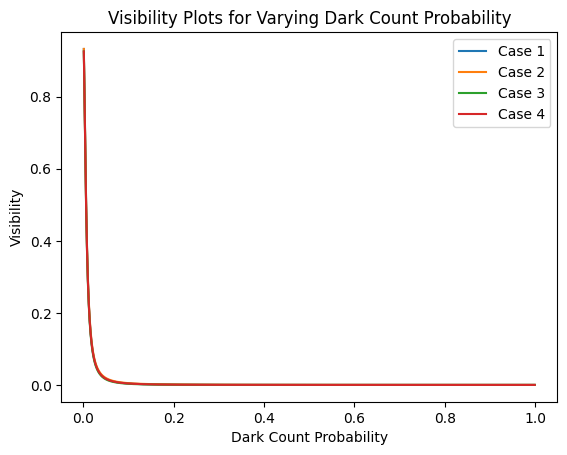

In [21]:
# Plot visibility based on varying dark count probability
plt.plot(range_PD, visibility_1_PD, label = 'Case 1')
plt.plot(range_PD, visibility_2_PD, label = 'Case 2')
plt.plot(range_PD, visibility_3_PD, label = 'Case 3')
plt.plot(range_PD, visibility_4_PD, label = 'Case 4')
plt.xlabel('Dark Count Probability')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Dark Count Probability')
plt.legend()
plt.savefig("visibility_PD.png")
plt.show()
# plt.close()

In [22]:
# Visibility based on varying detector efficiency
visibility_1_eta = []
visibility_2_eta = []
visibility_3_eta = []
visibility_4_eta = []
for i in range(len(range_eta)):
    visibility_1_eta.append(visibility(total_coin_prob_1_eta_high[i], total_coin_prob_1_eta_low[i]))
    visibility_2_eta.append(visibility(total_coin_prob_2_eta_high[i], total_coin_prob_2_eta_low[i]))
    visibility_3_eta.append(visibility(total_coin_prob_3_eta_high[i], total_coin_prob_3_eta_low[i]))
    visibility_4_eta.append(visibility(total_coin_prob_4_eta_high[i], total_coin_prob_4_eta_low[i]))
print(visibility_1_eta)
print(visibility_2_eta)
print(visibility_3_eta)
print(visibility_4_eta)

[0.9764137262090992, 0.9785060556501534, 0.9792096777239073, 0.9795769749725047, 0.9798114736946506, 0.9799800436490728, 0.9801111044498944, 0.9802187873895546, 0.980310912129636, 0.9803921564782772, 0.9804654902800711, 0.9805328897161238, 0.9805957207994974, 0.9806549579915949, 0.9807113151110892, 0.9807653270143692, 0.9808174023713616, 0.9808678588054065, 0.9809169469099901, 0.9809648670441908, 0.9810117813190947, 0.9810578223084656, 0.9811030994825886, 0.9811477040306166, 0.9811917125234523, 0.9812351897298728, 0.9812781908057978, 0.9813207630136659, 0.9813629470855194, 0.981404778313061, 0.9814462874264183, 0.9814875013079098, 0.9815284435758524, 0.9815691350652077, 0.981609594225725, 0.9816498374536409, 0.9816898793695252, 0.9817297330522045, 0.981769410236652, 0.9818089214821643, 0.9818482763158957, 0.9818874833558685, 0.9819265504167982, 0.9819654846014745, 0.9820042923799457, 0.982042979658364, 0.9820815518390335, 0.9821200138729451, 0.9821583703058732, 0.9821966253189349, 0.98

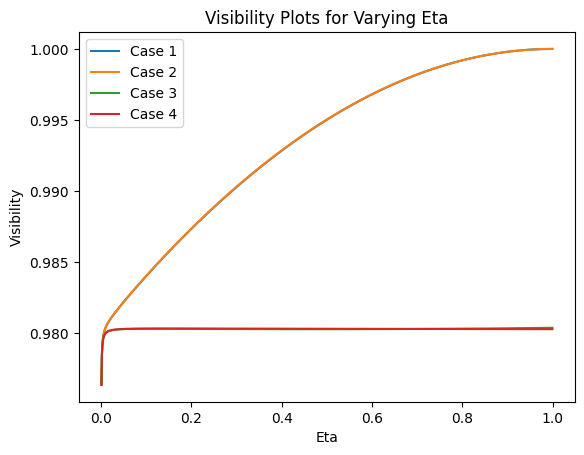

In [23]:
# Plot visibility based on varying detector efficiency
plt.plot(range_eta, visibility_1_eta, label = 'Case 1')
plt.plot(range_eta, visibility_2_eta, label = 'Case 2')
plt.plot(range_eta, visibility_3_eta, label = 'Case 3')
plt.plot(range_eta, visibility_4_eta, label = 'Case 4')
plt.xlabel('Eta')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Eta')
plt.legend()
plt.savefig("visibility_eta.png")
plt.show()
# plt.close()

In [24]:
# Visibility based on varying mean number of photons detected on some time interval
visibility_1_mu = []
visibility_2_mu = []
visibility_3_mu = []
visibility_4_mu = []
for i in range(len(range_mu)):
    visibility_1_mu.append(visibility(total_coin_prob_1_mu_high[i], total_coin_prob_1_mu_low[i]))
    visibility_2_mu.append(visibility(total_coin_prob_2_mu_high[i], total_coin_prob_2_mu_low[i]))
    visibility_3_mu.append(visibility(total_coin_prob_3_mu_high[i], total_coin_prob_3_mu_low[i]))
    visibility_4_mu.append(visibility(total_coin_prob_4_mu_high[i], total_coin_prob_4_mu_low[i]))
print(visibility_1_mu)
print(visibility_2_mu)
print(visibility_3_mu)
print(visibility_4_mu)

[0.9991543157503798, 0.9983465384267177, 0.9975399334825301, 0.9967345977482353, 0.9959305480701286, 0.995127787972278, 0.9943263171796171, 0.9935261339986916, 0.9927272361112122, 0.9919296208914534, 0.9911332855505018, 0.9903382272083626, 0.9895444429327663, 0.9887519297613285, 0.9879606847148273, 0.9871707048054926, 0.9863819870423491, 0.9855945284347714, 0.9848083259949012, 0.9840233767393285, 0.9832396776902824, 0.9824572258764864, 0.9816760183337808, 0.9808960521055793, 0.9801173242432096, 0.9793398318061641, 0.978563571862289, 0.9777885414879243, 0.9770147377680048, 0.9762421577961402, 0.9754707986746647, 0.974700657514677, 0.9739317314360642, 0.9731640175675131, 0.9723975130465186, 0.9716322150193805, 0.9708681206411964, 0.9701052270758523, 0.969343531496006, 0.9685830310830708, 0.9678237230271945, 0.967065604527239, 0.9663086727907546, 0.9655529250339573, 0.9647983584817015, 0.9640449703674533, 0.9632927579332639, 0.9625417184297397, 0.9617918491160149, 0.9610431472597218, 0.96

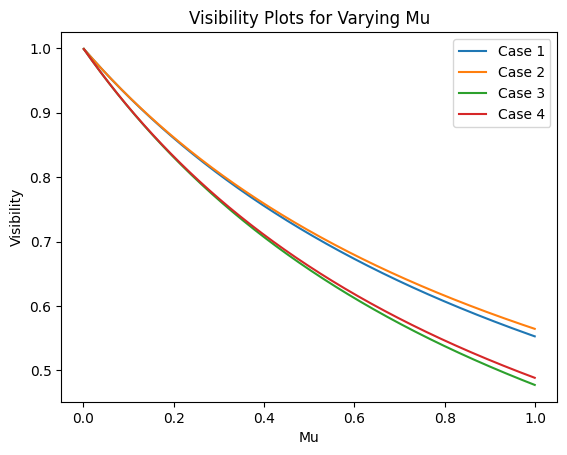

In [25]:
# Plot visibility based on varying detector efficiency
plt.plot(range_mu, visibility_1_mu, label = 'Case 1')
plt.plot(range_mu, visibility_2_mu, label = 'Case 2')
plt.plot(range_mu, visibility_3_mu, label = 'Case 3')
plt.plot(range_mu, visibility_4_mu, label = 'Case 4')
plt.xlabel('Mu')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Mu')
plt.legend()
plt.savefig("visibility_mu.png")
plt.show()
# plt.close()

In [26]:
visibility_2_PD_approx = []
visibility_3_PD_approx = []
visibility_4_PD_approx = []
for i in range(len(range_PD)):
    visibility_2_PD_approx.append(visibility(total_coin_prob_2_PD_high_approx[i], total_coin_prob_2_PD_low_approx[i]))
    visibility_3_PD_approx.append(visibility(total_coin_prob_3_PD_high_approx[i], total_coin_prob_3_PD_low_approx[i]))
    visibility_4_PD_approx.append(visibility(total_coin_prob_4_PD_high_approx[i], total_coin_prob_4_PD_low_approx[i]))
print(visibility_2_PD_approx)
print(visibility_3_PD_approx)
print(visibility_4_PD_approx)

[0.9259259259259258, 0.847457627118644, 0.7575757575757576, 0.6666666666666667, 0.5813953488372092, 0.5050505050505051, 0.43859649122807026, 0.38167938931297707, 0.3333333333333333, 0.2923976608187133, 0.2577319587628866, 0.22831050228310495, 0.20325203252032514, 0.18181818181818177, 0.16339869281045744, 0.1474926253687315, 0.13368983957219255, 0.12165450121654504, 0.11111111111111112, 0.10183299389002033, 0.09363295880149809, 0.08635578583765109, 0.07987220447284343, 0.0740740740740741, 0.06887052341597799, 0.06418485237483956, 0.05995203836930455, 0.05611672278338947, 0.05263157894736843, 0.04945598417408505, 0.04655493482309127, 0.04389815627743635, 0.04145936981757883, 0.03921568627450977, 0.03714710252600302, 0.035236081747709695, 0.03346720214190095, 0.03182686187141947, 0.030303030303030318, 0.028885037550548772, 0.027563395810363867, 0.02632964718272771, 0.025176233635448145, 0.02409638554216866, 0.02308402585410897, 0.022133687472332866, 0.021240441801189395, 0.020399836801305

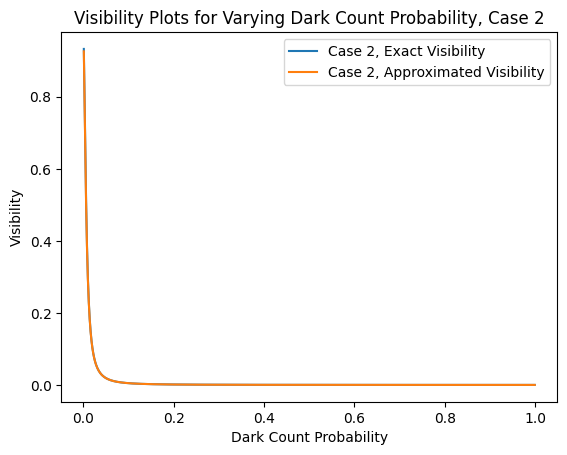

In [27]:
plt.plot(range_PD, visibility_2_PD, label = 'Case 2, Exact Visibility')
plt.plot(range_PD, visibility_2_PD_approx, label = 'Case 2, Approximated Visibility')
plt.xlabel('Dark Count Probability')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Dark Count Probability, Case 2')
plt.legend()
plt.savefig("visibility_PD_2_comp.png")
plt.show()

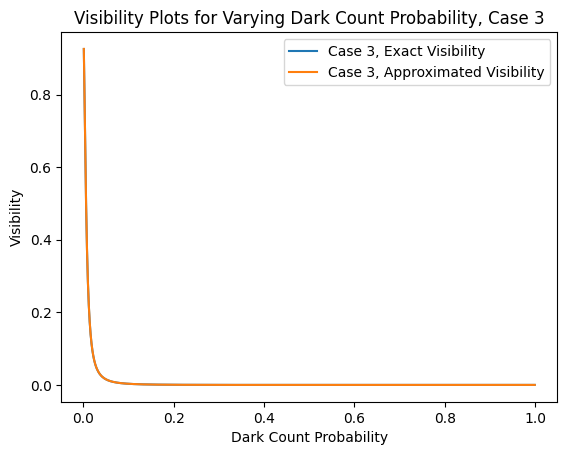

In [28]:
plt.plot(range_PD, visibility_3_PD, label = 'Case 3, Exact Visibility')
plt.plot(range_PD, visibility_3_PD_approx, label = 'Case 3, Approximated Visibility')
plt.xlabel('Dark Count Probability')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Dark Count Probability, Case 3')
plt.legend()
plt.savefig("visibility_PD_3_comp.png")
plt.show()

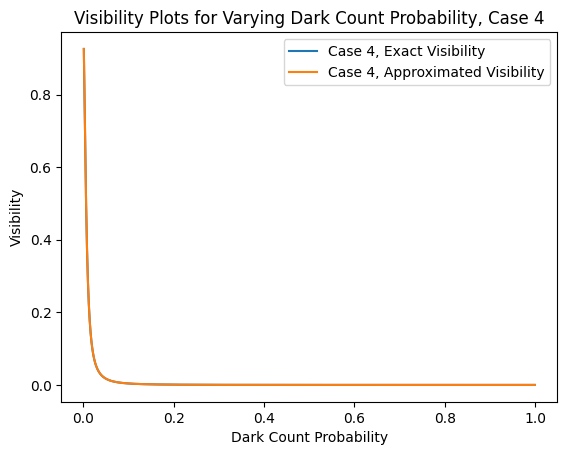

In [29]:
plt.plot(range_PD, visibility_4_PD, label = 'Case 4, Exact Visibility')
plt.plot(range_PD, visibility_4_PD_approx, label = 'Case 4, Approximated Visibility')
plt.xlabel('Dark Count Probability')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Dark Count Probability, Case 4')
plt.legend()
plt.savefig("visibility_PD_4_comp.png")
plt.show()

In [30]:
visibility_2_eta_approx = []
visibility_3_eta_approx = []
visibility_4_eta_approx = []
for i in range(len(range_eta)):
    visibility_2_eta_approx.append(visibility(total_coin_prob_2_eta_high_approx[i], total_coin_prob_2_eta_low_approx[i]))
    visibility_3_eta_approx.append(visibility(total_coin_prob_3_eta_high_approx[i], total_coin_prob_3_eta_low_approx[i]))
    visibility_4_eta_approx.append(visibility(total_coin_prob_4_eta_high_approx[i], total_coin_prob_4_eta_low_approx[i]))
print(visibility_2_eta_approx)
print(visibility_3_eta_approx)
print(visibility_4_eta_approx)

[0.9763718023823471, 0.9784257130277384, 0.9790909684297556, 0.9794199385413989, 0.9796161472088775, 0.9797464633874189, 0.9798393063537582, 0.9799088072366264, 0.9799627856107587, 0.9800059192357524, 0.9800411779285007, 0.9800705378545438, 0.9800953650188305, 0.9801166338794317, 0.9801350582548717, 0.9801511730035738, 0.9801653867990375, 0.9801780172692847, 0.9801893150132964, 0.9801994803962556, 0.9802086755358139, 0.9802170330126565, 0.9802246623042654, 0.9802316546072078, 0.980238086499973, 0.9802440227590621, 0.9802495185482302, 0.9802546211378407, 0.9802593712679336, 0.9802638042382685, 0.9802679507870805, 0.9802718378048343, 0.9802754889180262, 0.9802789249698243, 0.9802821644182061, 0.9802852236676556, 0.9802881173470037, 0.9802908585433502, 0.9802934589999511, 0.9802959292843926, 0.9802982789321246, 0.9803005165694685, 0.9803026500194418, 0.9803046863931378, 0.9803066321689097, 0.9803084932612128, 0.9803102750806548, 0.9803119825865275, 0.9803136203329049, 0.9803151925091999, 

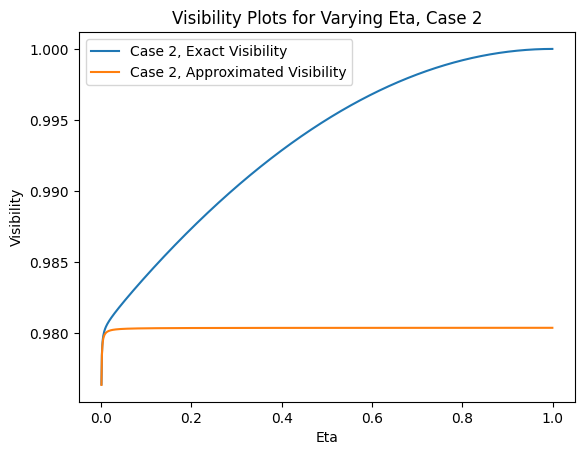

In [31]:
plt.plot(range_eta, visibility_2_eta, label = 'Case 2, Exact Visibility')
plt.plot(range_eta, visibility_2_eta_approx, label = 'Case 2, Approximated Visibility')
plt.xlabel('Eta')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Eta, Case 2')
plt.legend()
plt.savefig("visibility_eta_2_comp.png")
plt.show()

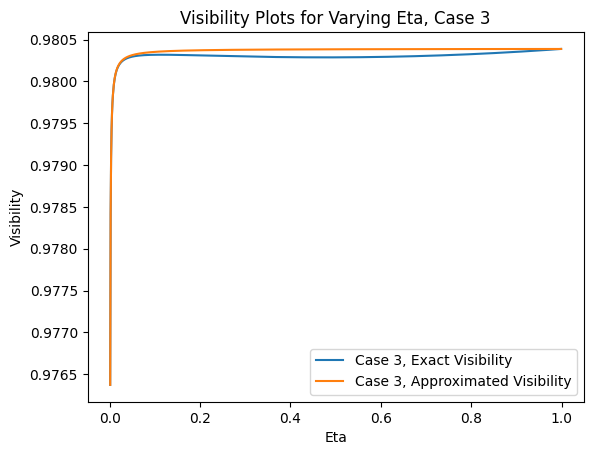

In [32]:
plt.plot(range_eta, visibility_3_eta, label = 'Case 3, Exact Visibility')
plt.plot(range_eta, visibility_3_eta_approx, label = 'Case 3, Approximated Visibility')
plt.xlabel('Eta')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Eta, Case 3')
plt.legend()
plt.savefig("visibility_eta_3_comp.png")
plt.show()

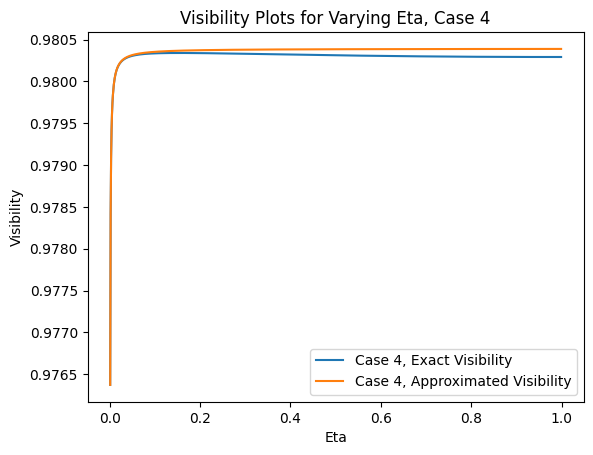

In [33]:
plt.plot(range_eta, visibility_4_eta, label = 'Case 4, Exact Visibility')
plt.plot(range_eta, visibility_4_eta_approx, label = 'Case 4, Approximated Visibility')
plt.xlabel('Eta')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Eta, Case 4')
plt.legend()
plt.savefig("visibility_eta_4_comp.png")
plt.show()

In [34]:
visibility_2_mu_approx = []
visibility_3_mu_approx = []
visibility_4_mu_approx = []
for i in range(len(range_mu)):
    visibility_2_mu_approx.append(visibility(total_coin_prob_2_mu_high_approx[i], total_coin_prob_2_mu_low_approx[i]))
    visibility_3_mu_approx.append(visibility(total_coin_prob_3_mu_high_approx[i], total_coin_prob_3_mu_low_approx[i]))
    visibility_4_mu_approx.append(visibility(total_coin_prob_4_mu_high_approx[i], total_coin_prob_4_mu_low_approx[i]))
print(visibility_2_mu_approx)
print(visibility_3_mu_approx)
print(visibility_4_mu_approx)

[0.9989606813071681, 0.9979639539411693, 0.9969690810643534, 0.9959761567291984, 0.9949851950182922, 0.9939961967054858, 0.9930091587788168, 0.9920240768211541, 0.9910409458036706, 0.9900597604031618, 0.9890805151462215, 0.9881032044812719, 0.9871278228172985, 0.9861543645459362, 0.9851828240546757, 0.9842131957350794, 0.9832454739880558, 0.9822796532273421, 0.981315727881851, 0.9803536923972844, 0.9793935412372532, 0.9784352688840631, 0.9774788698392708, 0.9765243386240718, 0.9755716697795728, 0.9746208578669767, 0.9736718974677043, 0.9727247831834674, 0.9717795096363062, 0.9708360714686023, 0.9698944633430638, 0.9689546799427022, 0.9680167159707892, 0.9670805661508081, 0.966146225226396, 0.9652136879612789, 0.9642829491392033, 0.9633540035638622, 0.9624268460588191, 0.9615014714674295, 0.9605778746527592, 0.9596560504975035, 0.9587359939039016, 0.9578176997936539, 0.9569011631078349, 0.9559863788068095, 0.9550733418701447, 0.9541620472965247, 0.9532524901036633, 0.9523446653282187, 0

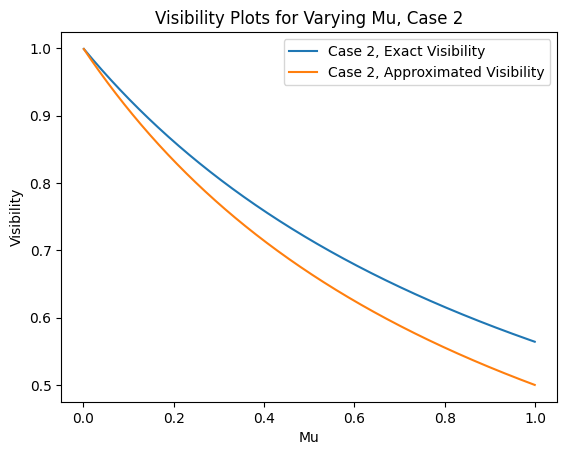

In [35]:
plt.plot(range_mu, visibility_2_mu, label = 'Case 2, Exact Visibility')
plt.plot(range_mu, visibility_2_mu_approx, label = 'Case 2, Approximated Visibility')
plt.xlabel('Mu')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Mu, Case 2')
plt.legend()
plt.savefig("visibility_mu_2_comp.png")
plt.show()

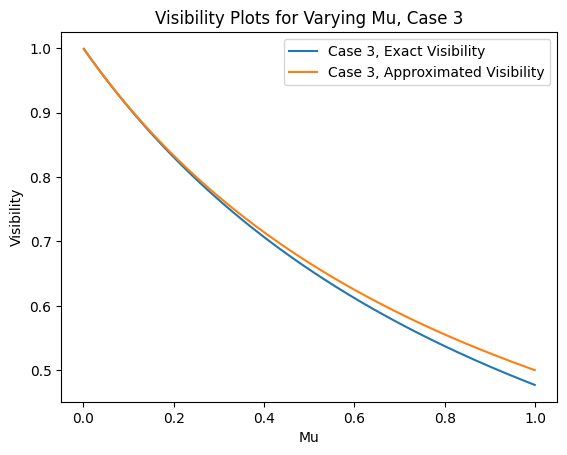

In [36]:
plt.plot(range_mu, visibility_3_mu, label = 'Case 3, Exact Visibility')
plt.plot(range_mu, visibility_3_mu_approx, label = 'Case 3, Approximated Visibility')
plt.xlabel('Mu')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Mu, Case 3')
plt.legend()
plt.savefig("visibility_mu_3_comp.png")
plt.show()

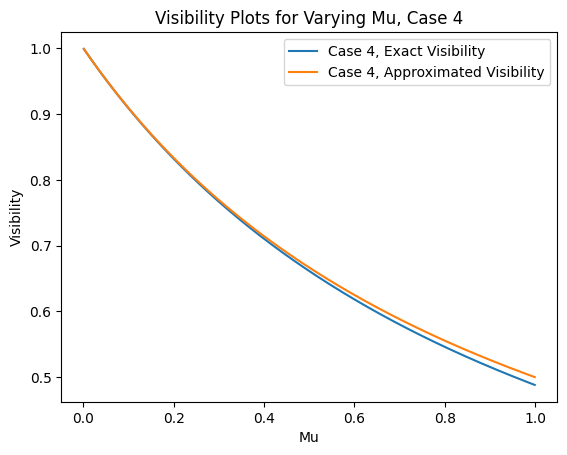

In [37]:
plt.plot(range_mu, visibility_4_mu, label = 'Case 4, Exact Visibility')
plt.plot(range_mu, visibility_4_mu_approx, label = 'Case 4, Approximated Visibility')
plt.xlabel('Mu')
plt.ylabel('Visibility')
plt.title('Visibility Plots for Varying Mu, Case 4')
plt.legend()
plt.savefig("visibility_mu_4_comp.png")
plt.show()